## Introduction 

This is an Exploratory Data Analysis of my fitbit data (3 months of data). The main idea behind this project was to look at the fitbit data on a much deeper level and see if I can leverage the insights to better my health. These were a few questions I had in mind when starting the analysis:

1. How does my activity levels look like when my sleep efficiency is better than normal days?
2. How does my calorie burn change throughout the week?
3. Which factors contribute the most to a higher sleep efficiency score?
4. How often does my Resting Heart Beat fluctuate? What causes these fluctuations? etc..
    


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from scipy import stats
import os
pd.set_option("display.precision", 2)
import warnings
warnings.filterwarnings('ignore') 

In [28]:
#define working directory
# os.chdir('')

In [4]:
df = pd.read_excel('fitbit database.xlsx')
df.head(10)

,Active Score,Activity Calories,Calories BMR,Calories Burned,Cardio calories,Cardio minutes,Day of Week,Distance (Km),Elevation (Ft),Fat Burn calories,...,Minutes Light sleep,Minutes REM sleep,Minutes to fall asleep,REM sleep count,Sleep Efficiency,Sleep End time,Sleep Start time,Time in bed,Day Name,Date
0,-1,1346,1746,2801,0.00,0,5,4.13,10,416.84,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,Friday,2020-01-03
1,-1,1155,1746,2673,0.00,0,6,4.26,80,250.69,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,Saturday,2020-01-04
2,-1,582,1746,2229,0.00,0,7,1.57,0,46.09,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,Sunday,2020-01-05
3,-1,2039,1746,3412,60.15,5,1,7.16,100,777.77,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,Monday,2020-01-06
4,-1,1599,1746,3077,130.25,11,2,5.11,20,846.41,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,Tuesday,2020-01-07
5,-1,1768,1746,3223,122.98,10,3,5.51,60,856.72,...,281.0,129.0,0.0,11.0,93.0,2020-01-09 09:01:00,2020-01-09 00:41:30,499.0,Wednesday,2020-01-08
6,-1,1919,1746,3331,22.56,2,4,7.89,20,626.53,...,239.0,105.0,0.0,12.0,89.0,2020-01-10 08:58:30,2020-01-10 00:31:30,507.0,Thursday,2020-01-09
7,-1,826,1746,2415,0.00,0,5,2.35,40,120.67,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,Friday,2020-01-10
8,-1,745,1746,2314,0.00,0,6,1.67,0,36.87,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,Saturday,2020-01-11
9,-1,1195,1746,2706,0.00,0,7,4.51,100,380.94,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,Sunday,2020-01-12


The first step before starting any form of EDA is to check if the data types are correct.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 43 columns):
Active Score              91 non-null int64
Activity Calories         91 non-null int64
Calories BMR              91 non-null int64
Calories Burned           91 non-null int64
Cardio calories           91 non-null float64
Cardio minutes            91 non-null int64
Day of Week               91 non-null int64
Distance (Km)             91 non-null float64
Elevation (Ft)            91 non-null int64
Fat Burn calories         91 non-null float64
Fat Burn minutes          91 non-null int64
Floors                    91 non-null int64
Is Weekday                91 non-null int64
Is Weekend                91 non-null int64
Minutes Fairly Active     91 non-null int64
Minutes Lightly Active    91 non-null int64
Minutes Sedentary         91 non-null int64
Minutes Very Active       91 non-null int64
Normal Cardio calories    91 non-null float64
Normal Cardio minutes     91 non-null int64
Peak calo

Looks like our data types are correct. Next, we can also check the number of null values to get an idea about the data.

In [4]:
df.isnull().sum()

Active Score               0
Activity Calories          0
Calories BMR               0
Calories Burned            0
Cardio calories            0
Cardio minutes             0
Day of Week                0
Distance (Km)              0
Elevation (Ft)             0
Fat Burn calories          0
Fat Burn minutes           0
Floors                     0
Is Weekday                 0
Is Weekend                 0
Minutes Fairly Active      0
Minutes Lightly Active     0
Minutes Sedentary          0
Minutes Very Active        0
Normal Cardio calories     0
Normal Cardio minutes      0
Peak calories              0
Peak minutes               0
Resting Heart Rate         1
Steps                      0
% Deep sleep              18
% Light sleep             18
% REM sleep               18
Deep sleep count          18
Light sleep count         18
Minutes Asleep            18
Minutes Awake             18
Minutes Awake count       18
Minutes Deep sleep        18
Minutes Light sleep       18
Minutes REM sl

Lastly, we can use descrptive statistics as well for our analysis.

In [5]:
df.describe()

,Active Score,Activity Calories,Calories BMR,Calories Burned,Cardio calories,Cardio minutes,Day of Week,Distance (Km),Elevation (Ft),Fat Burn calories,...,Minutes Asleep,Minutes Awake,Minutes Awake count,Minutes Deep sleep,Minutes Light sleep,Minutes REM sleep,Minutes to fall asleep,REM sleep count,Sleep Efficiency,Time in bed
count,91.0,91.00,91.00,91.00,91.00,91.00,91.00,91.00,91.00,91.00,...,73.00,73.00,73.00,73.00,73.00,73.00,80.0,73.00,80.00,80.00
mean,-1.0,1468.29,1735.66,2953.46,38.52,3.20,4.00,5.07,56.92,440.14,...,429.42,61.05,31.74,68.10,258.08,103.25,0.0,10.00,92.10,486.68
std,0.0,483.24,98.64,439.71,67.25,5.38,2.01,2.09,53.39,277.85,...,64.93,11.56,6.78,21.14,44.20,20.31,0.0,3.14,2.04,75.50
min,-1.0,0.00,805.00,806.00,0.00,0.00,1.00,0.00,0.00,0.00,...,187.00,21.00,13.00,18.00,129.00,30.00,0.0,2.00,84.00,208.00
25%,-1.0,1121.00,1746.00,2674.50,0.00,0.00,2.00,3.54,10.00,182.71,...,412.00,56.00,28.00,55.00,239.00,99.00,0.0,8.00,91.00,472.00
50%,-1.0,1496.00,1746.00,3027.00,0.00,0.00,4.00,5.21,50.00,437.09,...,438.00,62.00,32.00,68.00,262.00,108.00,0.0,10.00,92.00,499.50
75%,-1.0,1799.50,1746.00,3247.00,63.00,5.50,6.00,6.14,100.00,623.92,...,465.00,68.00,35.00,83.00,290.00,115.00,0.0,12.00,94.00,531.25
max,-1.0,2568.00,1746.00,3894.00,484.39,38.00,7.00,10.84,210.00,1091.76,...,521.00,93.00,46.00,119.00,351.00,134.00,0.0,17.00,96.00,590.00


In [6]:
df.columns

Index(['Active Score', 'Activity Calories', 'Calories BMR', 'Calories Burned',
       'Cardio calories', 'Cardio minutes', 'Day of Week', 'Distance (Km)',
       'Elevation (Ft)', 'Fat Burn calories', 'Fat Burn minutes', 'Floors',
       'Is Weekday', 'Is Weekend', 'Minutes Fairly Active',
       'Minutes Lightly Active', 'Minutes Sedentary', 'Minutes Very Active',
       'Normal Cardio calories', 'Normal Cardio minutes', 'Peak calories',
       'Peak minutes', 'Resting Heart Rate', 'Steps', '% Deep sleep',
       '% Light sleep', '% REM sleep', 'Deep sleep count', 'Light sleep count',
       'Minutes Asleep', 'Minutes Awake', 'Minutes Awake count',
       'Minutes Deep sleep', 'Minutes Light sleep', 'Minutes REM sleep',
       'Minutes to fall asleep', 'REM sleep count', 'Sleep Efficiency',
       'Sleep End time', 'Sleep Start time', 'Time in bed', 'Day Name',
       'Date'],
      dtype='object')

## Data Exploration using Pandas:

Pandas can be a very useful tool to uncover some insights initially and understand your data better. 

Let's use Pandas first, followed by using visualizations for our analysis.

### 1. What is my average step count on days where my sleep efficiency is above 90?     Is it different from the normal average step count?

In [7]:

a = round(df['Steps'].mean(),0)
b = round(df[df['Sleep Efficiency'] > 90]['Steps'].mean(),0)

c = round(b - a ,0)

print('Average Steps: ' +str(a))
print('Average Steps when Sleep Efficiency is more than 90 : ' +str(b))
print('Difference between Steps: ' +str(c))

Average Steps: 11118.0
Average Steps when Sleep Efficiency is more than 90 : 11252.0
Difference between Steps: 134.0


Okay, so when I have a sleep efficiency of above 90, I tend to walk 135 steps more on average. 


Let's see what happens on days when my sleep efficiency is below 90.


In [8]:
a = round(df['Steps'].mean(),0)
b = round(df[df['Sleep Efficiency'] < 90]['Steps'].mean(),0)

c = round(b - a ,0)

print('Average Steps: ' +str(a))
print('Average Steps when Sleep Efficiency is less than 90 : ' +str(b))
print('Difference between Steps: ' +str(c))

Average Steps: 11118.0
Average Steps when Sleep Efficiency is less than 90 : 12289.0
Difference between Steps: 1171.0


Interestingly, on days I have a sleep efficiency below 90, I tend to walk more. 

As seen from the above results, I walk about 1172 more steps on average whenever my sleep efficiency is below 90. This is a really surprising insight even for me as well.

### 2. How does my average calorie burn relate to my sleep efficiency score?

In [9]:
a = df['Calories Burned'].mean()
b = df[df['Sleep Efficiency'] < 85]['Calories Burned'].mean()

c = b - a 

print('Calories burnt on average: ' +str(a))
print('Calories burnt on average when Sleep Efficiency is less than 85 : ' +str(b))
print('Difference between Calories Burnt: ' +str(c))

Calories burnt on average: 2953.4615384615386
Calories burnt on average when Sleep Efficiency is less than 85 : 2338.0
Difference between Calories Burnt: -615.4615384615386


On days my sleep efficiency is below 85, I tend to burn 615 calories less as compared to my average calorie burn. This is a pretty interesting insight as well. I guess one cannot underestimate the power of a good night's sleep.

##### Let's move our analysis to the Resting Heart Beat (RHB) now and see if we can find some interesting insights as well!
** Research has shown that a lower RHB indicates a more active lifestyle**

### 3. How does my RHB relate to my sleep efficiency score?

In [10]:
a = round(df['Resting Heart Rate'].mean(),1)
b = round(df[df['Sleep Efficiency'] < 85]['Resting Heart Rate'].mean(),1)

c = round(b - a ,1)

print('Average RHB: ' +str(a))
print('Average RHB when Sleep Efficiency is less than 85 : ' +str(b))
print('Difference between RHB: ' +str(c))

Average RHB: 54.0
Average RHB when Sleep Efficiency is less than 85 : 57.0
Difference between RHB: 3.0


From the results above, I can see that when my sleep efficiency is less than 85, my RHB rises by 3 BPM on average.

Let's see how my RHB behaves when I get a good night's sleep (Sleep Efficiency is more than 85)

In [11]:
a = round(df['Resting Heart Rate'].mean(),1)
b = round(df[df['Sleep Efficiency'] > 85]['Resting Heart Rate'].mean(),1)

c = round(b - a,1)

print('Average RHB: ' +str(a))
print('Average RHB when Sleep Efficiency is more than 85 : ' +str(b))
print('Difference between RHB: ' +str(c))

Average RHB: 54.0
Average RHB when Sleep Efficiency is more than 85 : 53.5
Difference between RHB: -0.5


Although the difference is not quite substantial, one can already see an indication that a good night's sleep promotes a lower RHB.

### 4. What does my average RHB vary on days when I'm more active than usual?

In [12]:
a = df[(df['Minutes Very Active'] > df['Minutes Very Active'].mean())]['Resting Heart Rate'].mean()
b = df[(df['Minutes Very Active'] < df['Minutes Very Active'].mean())]['Resting Heart Rate'].mean()

c = round(b-a,1)

print('Average RHB when I am more active than usual: ' +str(a))
print('Average RHB when I am less active than usual : ' +str(b))
print('Difference between RHB: ' +str(c))

Average RHB when I am more active than usual: 53.45
Average RHB when I am less active than usual : 54.38
Difference between RHB: 0.9


As expected, the more active I'm, the higher the probability of a lower RHB. 

### 5. What does my step count affect my RHB?

In [13]:
a = round(df['Steps'].mean(),0)
b = round(df[df['Resting Heart Rate'] >= 55]['Steps'].mean(),0)
c = round(df[df['Resting Heart Rate'] < 55]['Steps'].mean(),0)

print('Average Steps: ' +str(a))
print('Average Steps when Resting Heart Rate is more than 55 : ' +str(b))
print('Average Steps when Resting Heart Rate is less than 55 : ' +str(c))

Average Steps: 11118.0
Average Steps when Resting Heart Rate is more than 55 : 10067.0
Average Steps when Resting Heart Rate is less than 55 : 12061.0


No surprises here as well. The results above indicate that a higher step count promotes a lower RHB.

As seen from the above analysis, Pandas can serve as a very good library to perform some quick analysis and get an intuition of your data. Let's move on to the next phase, where we would be using graphs and visualizations for our data analysis.

## Data Exploration using Visualizations:

Data analysis using graphs and charts prove to be very useful to look at your data. 

We shall be using Matplotlib and Seaborn for our analysis.

### Histograms
Let's start by using histograms to see if the data follows a particular kind of distribution.

Since we have a lot of features, let's extract a subset for our analysis.

In [49]:
df1 = df[['Steps','Minutes Very Active','Calories Burned','Normal Cardio calories','Minutes Sedentary','Minutes Deep sleep',\
          'Minutes Light sleep', 'Minutes REM sleep','Time in bed','Resting Heart Rate','Peak calories','Peak minutes']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026978FD3BE0>,
      dtype=object)

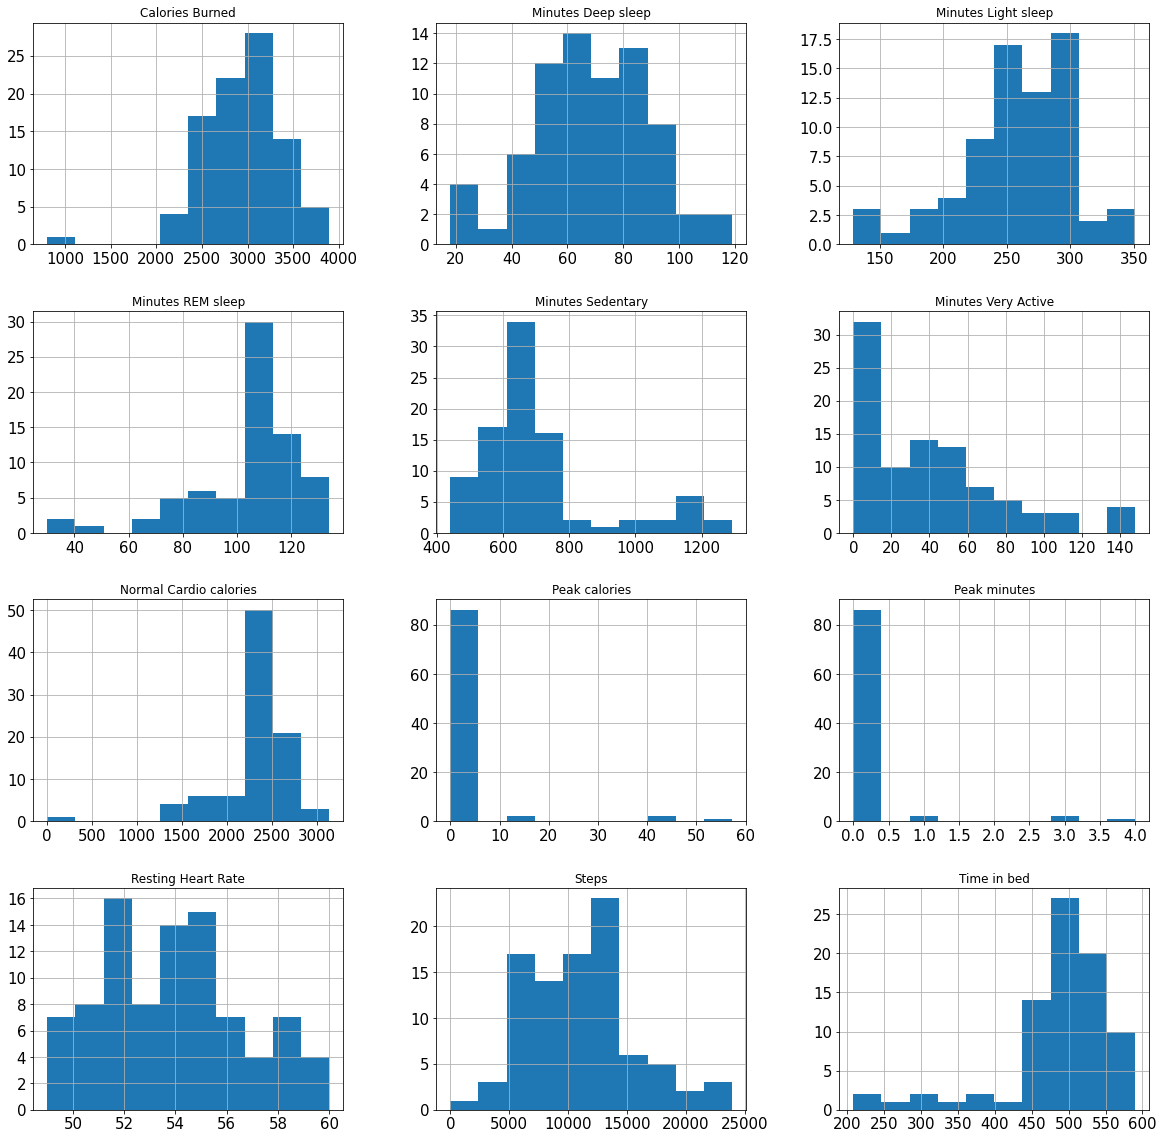

In [16]:
import warnings
warnings.filterwarnings('ignore')        
df1.hist(figsize=(20,20), bins = 10, xlabelsize=15, ylabelsize= 15)

As seen from the above plots, a few of the variables (Minutes Deep Sleep, Steps, Resting Heart Beat) follows a normal distribution. It would be interesting to carry out some form of hypothesis testing as well if the distributions behave the same on both weekdays and weekends; or there would be a significant difference between them.

### Scatter plots and Correlation Plots/Matrix:
Since most of the variables in our dataset are numerical, it would be interesting to plot scatter plots and see how the variables interact with one another.

Before moving on, let's add an extra column to our data, stating if it's the weekend/weekday.

In [13]:
df['Time of week'] = np.where((df['Day Name'] == 'Saturday') | (df['Day Name'] == 'Sunday'), 'Weekend', 'Weekday')
# df['Time of week'] = ['Weekend' if (x =='Sunday') | (x =='Saturday') else 'Weekday' for x in df['Day Name']] 

In [18]:
df['Time of week'].value_counts()

Weekday    65
Weekend    26
Name: Time of week, dtype: int64

In [19]:
df['Time of week'] = df['Time of week'].astype('object')

Let's pick a subset of our original data and use pairplots.

In [20]:
pplot = ['Steps','Calories Burned','Minutes Sedentary','Minutes Deep sleep','Minutes REM sleep',\
         'Time in bed','Resting Heart Rate','Sleep Efficiency']

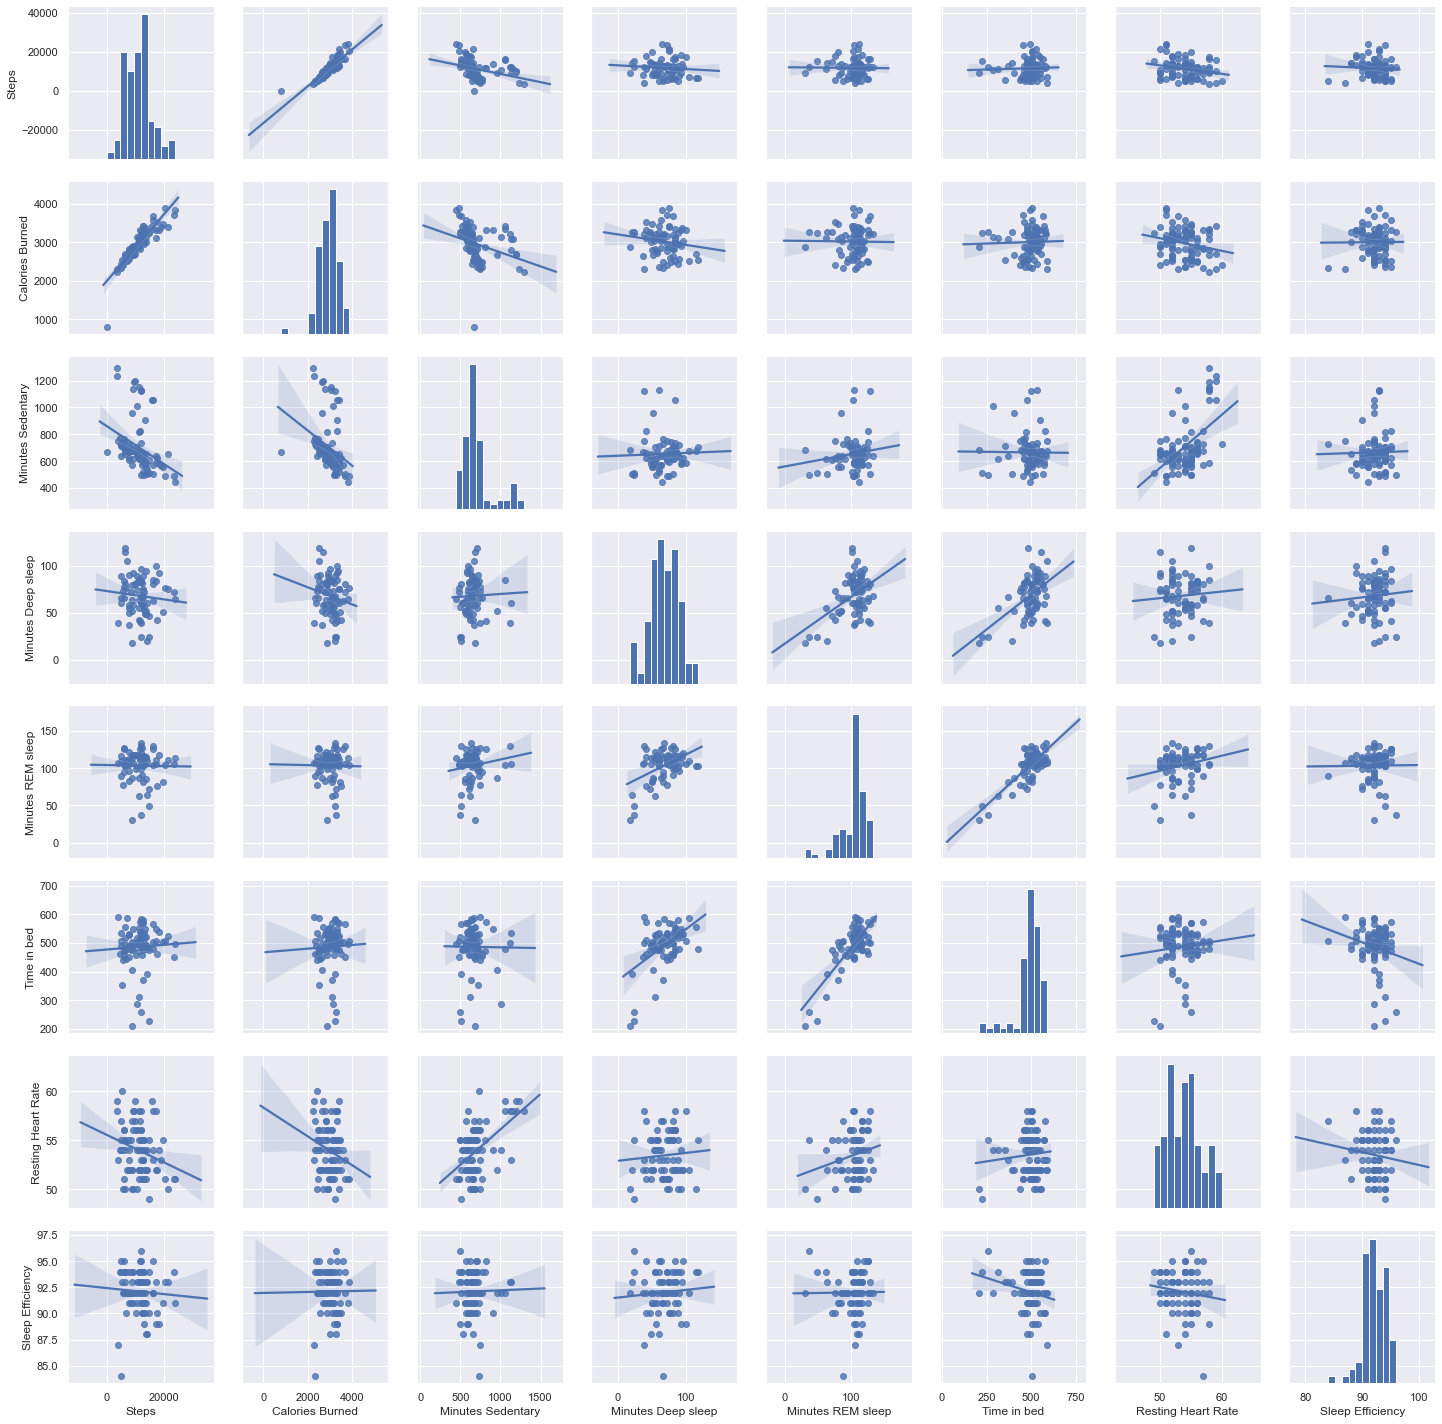

In [22]:
sns.set()
sns.pairplot(df[pplot], kind = 'reg')

Regression plots serve as a better tool because along with the scatter plots, we get a best fit line which shows the trend of the data points. Also, if we see that this trend line passes through majority of the points, we can assume that we can use this data for a good predictive model as well.

Some of the notable insights from the above plots are:

1. Sleep efficiency is positively related to the amount of "Deep Sleep" followed by "REM Sleep". Interestingly, it is        negatively related to "Time in bed". This is an indication that more sleep doesn't necessarily promote better sleep.
    
2. Calories Burned is inversely related to my Resting Heart Beat. This means the more I stay active, the more calories I burn, which ultimately results in a lower RHB.
    
3. RHB is highly correlated to 'Minutes Sedentary'. The irony here is that some people might feel that by staying sedentary, they keep their heart rate to a minimum level, which might mean their RHB will also stay low. But clearly, that is not the case here.

The next step is to use correlation and heatmaps:

In [23]:
df1.corr()

,Steps,Minutes Very Active,Calories Burned,Normal Cardio calories,Minutes Sedentary,Minutes Deep sleep,Minutes Light sleep,Minutes REM sleep,Time in bed,Resting Heart Rate,Peak calories,Peak minutes
Steps,1.00,0.89,0.90,0.44,-3.45e-01,-9.17e-02,1.07e-01,-0.01,4.76e-02,-2.47e-01,1.80e-01,1.78e-01
Minutes Very Active,0.89,1.00,0.75,0.27,-3.39e-01,2.41e-02,2.69e-01,0.12,2.45e-01,-2.87e-01,2.81e-01,2.78e-01
Calories Burned,0.90,0.75,1.00,0.51,-3.08e-01,-1.57e-01,1.47e-01,-0.01,3.12e-02,-2.19e-01,2.25e-01,2.24e-01
Normal Cardio calories,0.44,0.27,0.51,1.00,-6.73e-01,-3.48e-02,-2.70e-01,-0.20,-1.22e-01,-5.36e-01,-1.70e-01,-1.71e-01
Minutes Sedentary,-0.35,-0.34,-0.31,-0.67,1.00e+00,3.49e-02,5.13e-02,0.15,-9.26e-03,5.36e-01,8.65e-02,8.87e-02
Minutes Deep sleep,-0.09,0.02,-0.16,-0.03,3.49e-02,1.00e+00,5.91e-02,0.47,5.14e-01,7.52e-02,3.88e-03,2.84e-03
Minutes Light sleep,0.11,0.27,0.15,-0.27,5.13e-02,5.91e-02,1.00e+00,0.49,8.47e-01,4.65e-03,4.41e-02,4.34e-02
Minutes REM sleep,-0.01,0.12,-0.01,-0.20,1.47e-01,4.72e-01,4.94e-01,1.00,7.96e-01,2.24e-01,1.48e-01,1.49e-01
Time in bed,0.05,0.25,0.03,-0.12,-9.26e-03,5.14e-01,8.47e-01,0.80,1.00e+00,9.89e-02,6.79e-02,6.74e-02
Resting Heart Rate,-0.25,-0.29,-0.22,-0.54,5.36e-01,7.52e-02,4.65e-03,0.22,9.89e-02,1.00e+00,2.95e-02,3.15e-02


A correlation matrix allows one to see the relationship between different numerical variables at a glance. We can also find the correlation for a single variable of interest. For e.g:

In [24]:
print(df.corrwith(df['Sleep Efficiency']).sort_values(ascending = False).head(10))
print('---------------------------------------------------------------')
print(df.corrwith(df['Sleep Efficiency']).sort_values(ascending = False).tail(10))

Sleep Efficiency          1.00
Minutes Lightly Active    0.23
% REM sleep               0.22
% Deep sleep              0.16
Is Weekday                0.11
Normal Cardio calories    0.09
Peak minutes              0.09
Peak calories             0.08
Minutes Deep sleep        0.07
Deep sleep count          0.03
dtype: float64
---------------------------------------------------------------
Is Weekend               -0.11
Minutes Very Active      -0.12
Resting Heart Rate       -0.12
Minutes Asleep           -0.15
Time in bed              -0.20
Minutes Light sleep      -0.26
Minutes Awake            -0.43
Active Score               NaN
Calories BMR               NaN
Minutes to fall asleep     NaN
dtype: float64


Here, we are looking at the top 10 and bottom 10 variables affecting our Sleep Efficiency. Interestingly, good levels of REM and Deep Sleep seem to promote better Sleep Quality. Also, my sleep efficiency is better during weekdays as compared to weekends.

Last but not the least, heatmaps are a very useful way to carry out correlation analysis as well.

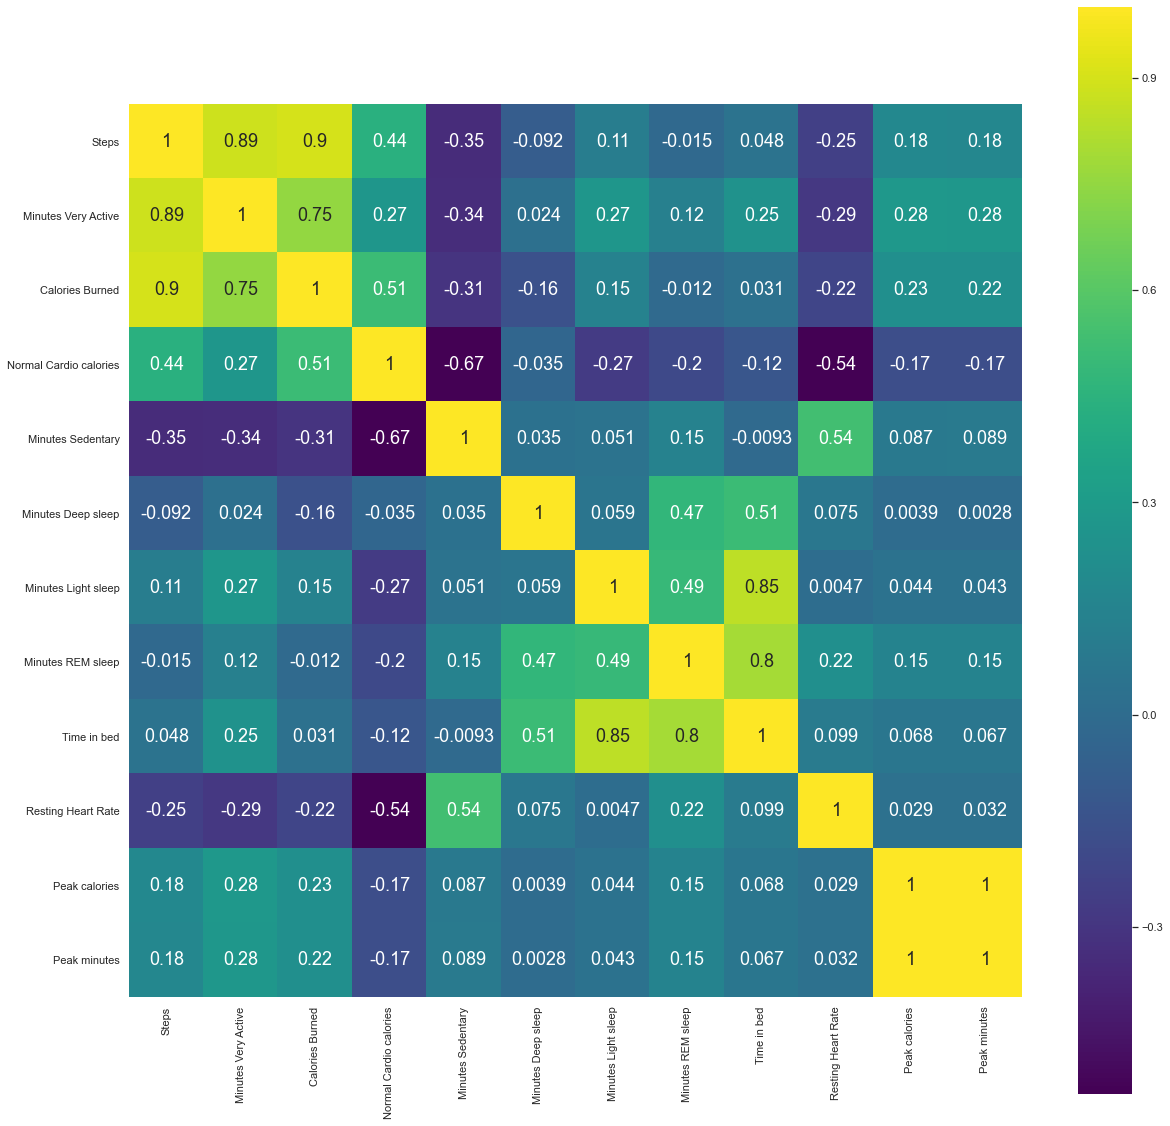

In [50]:
corr = df1.corr()
plt.figure(figsize = (20,20))

sns.heatmap(corr, annot= True, robust=True,\
            annot_kws= {"size" : 18},cmap='viridis',\
            square= True)

### Box-Plots
Box plots help us to combine both numerical and categorical variables and understand how they relate to each other. The best thing about using box plots is that you directly get an understanding of your data distribution (the mean, the spread, left/right skewed etc).In our case, we have 2 categorical variables :

Name of day

Weekend/ Weekday

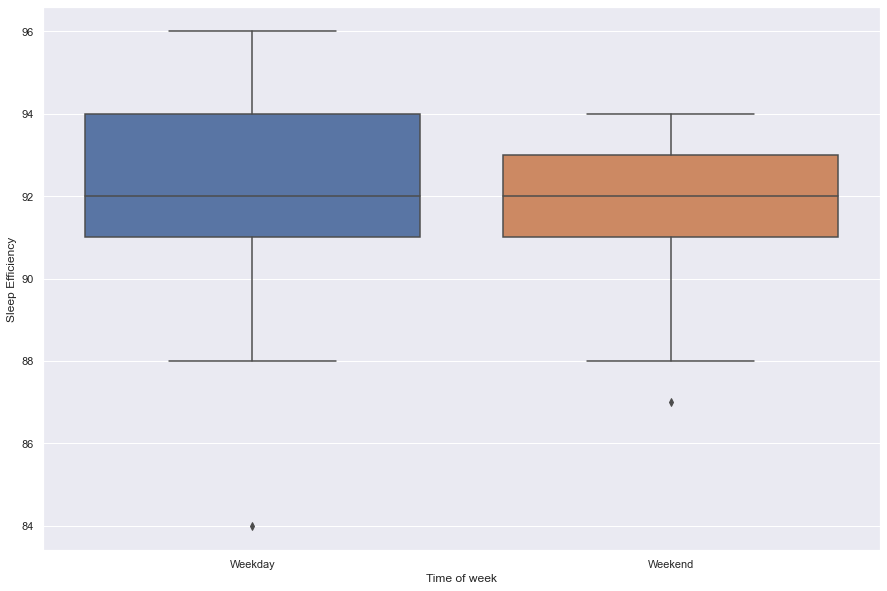

In [26]:
plt.figure(figsize = (15,10))
box1 = sns.boxplot(x = 'Time of week', y = 'Sleep Efficiency', data = df)

Right away, we can see my sleep efficiency looks much better for weekdays as compared to weekends. Let's dig deeper into this and see this changes for every single day of the week.

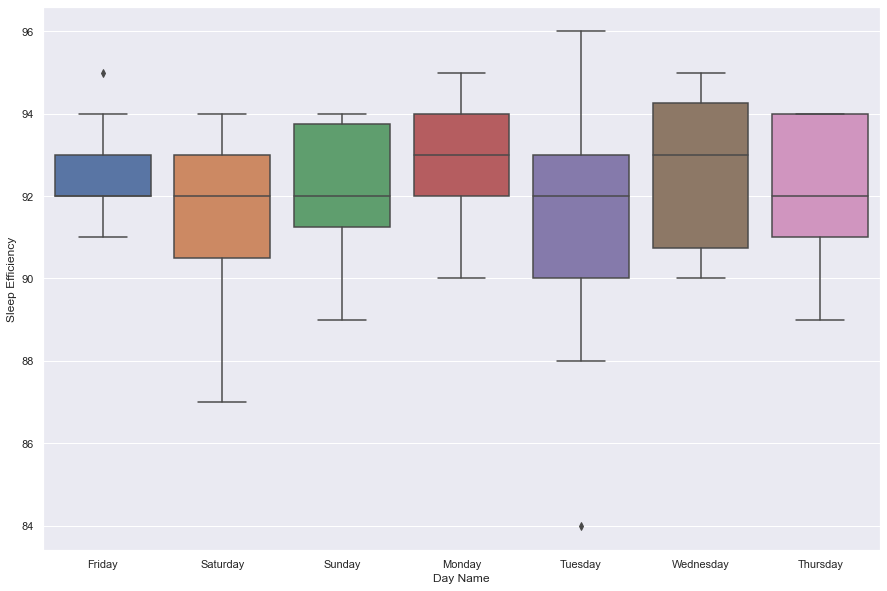

In [27]:
plt.figure(figsize = (15,10))
box1 = sns.boxplot(x = 'Day Name', y = 'Sleep Efficiency', data = df)

As expected, the middle whisker (mean value) is skewed more towards the lower whisker (25th percentile) for Sunday, while the overall spread is the highest for Saturday. This is clearly an indication that my sleep quality can be improved on the weekends.

Now let's look at my number of active minutes as well.

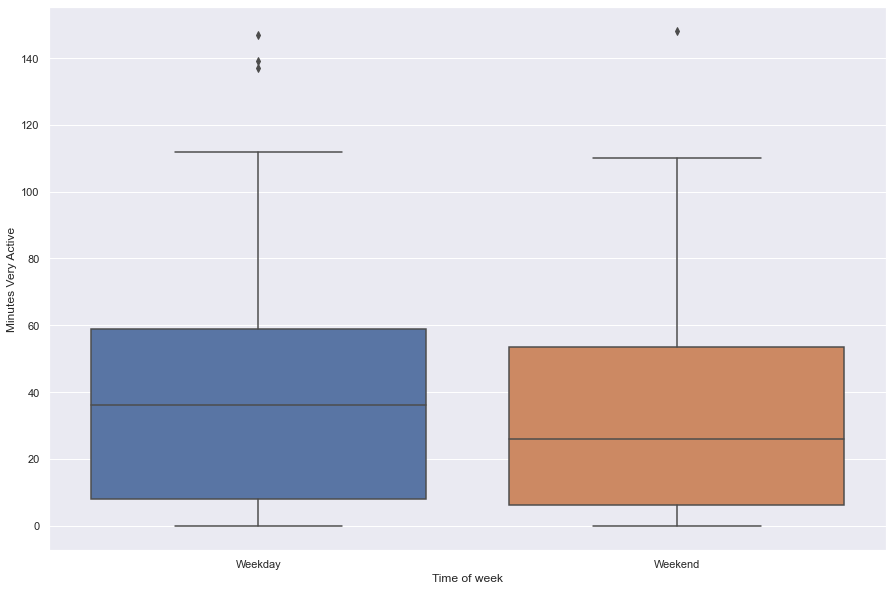

In [28]:
plt.figure(figsize = (15,10))
box1 = sns.boxplot(x = 'Time of week', y = 'Minutes Very Active', data = df)

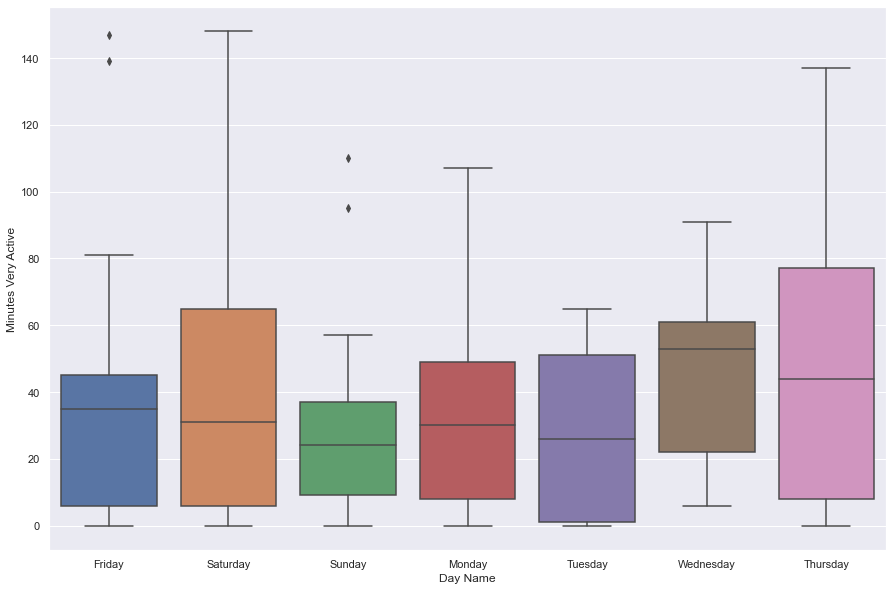

In [29]:
plt.figure(figsize = (15,10))
box1 = sns.boxplot(x = 'Day Name', y = 'Minutes Very Active', data = df)

Look at that sudden dip between active minutes on Saturday v/s Sunday.

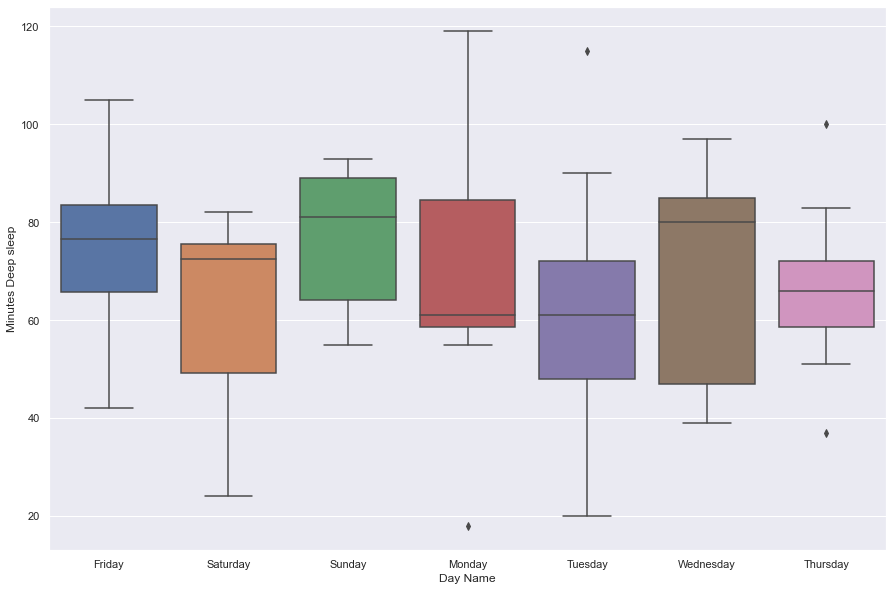

In [7]:
plt.figure(figsize = (15,10))
box1 = sns.boxplot(x = 'Day Name', y = 'Minutes Deep sleep', data = df)

### Line/Trend Chart:

Trend chart (as the name suggests), help us to look at the distribution of our variables over time.

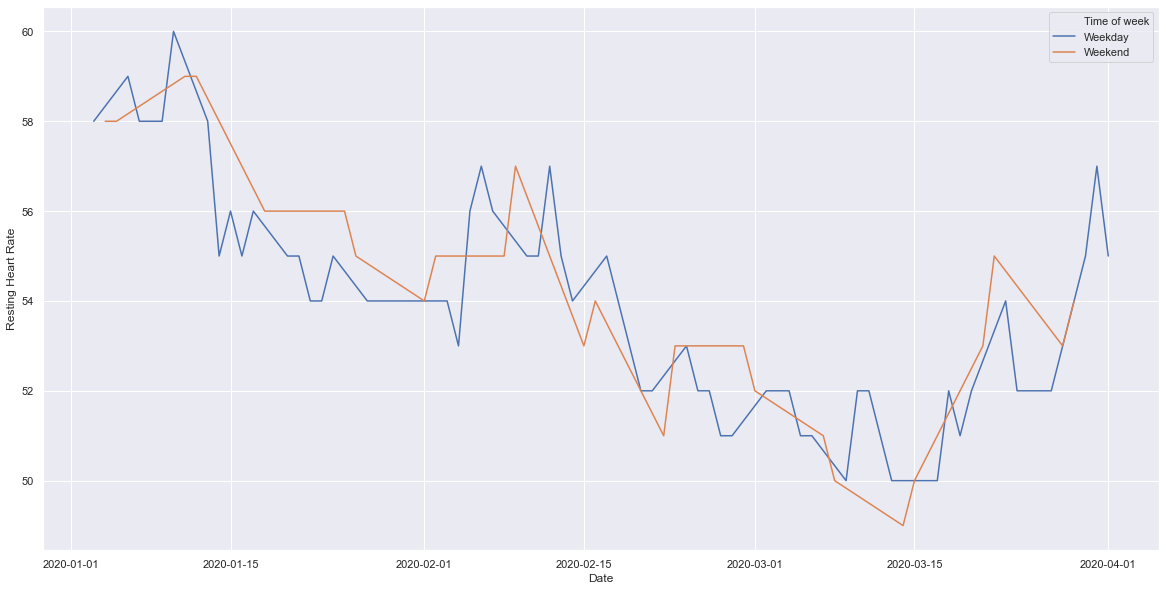

In [21]:
plt.figure(figsize = (20,10))
RHBtrend = sns.lineplot(x ='Date', y = 'Resting Heart Rate',\
                      hue="Time of week",\
                      data = df )

Quite an interesting trend here which shows my RHB gradually decreasing and then starting to spike up again since the last 3 weeks. It makes sense because I have been mostly indoors since the last 3 weeks as a precautionary measure against Coronavirus.

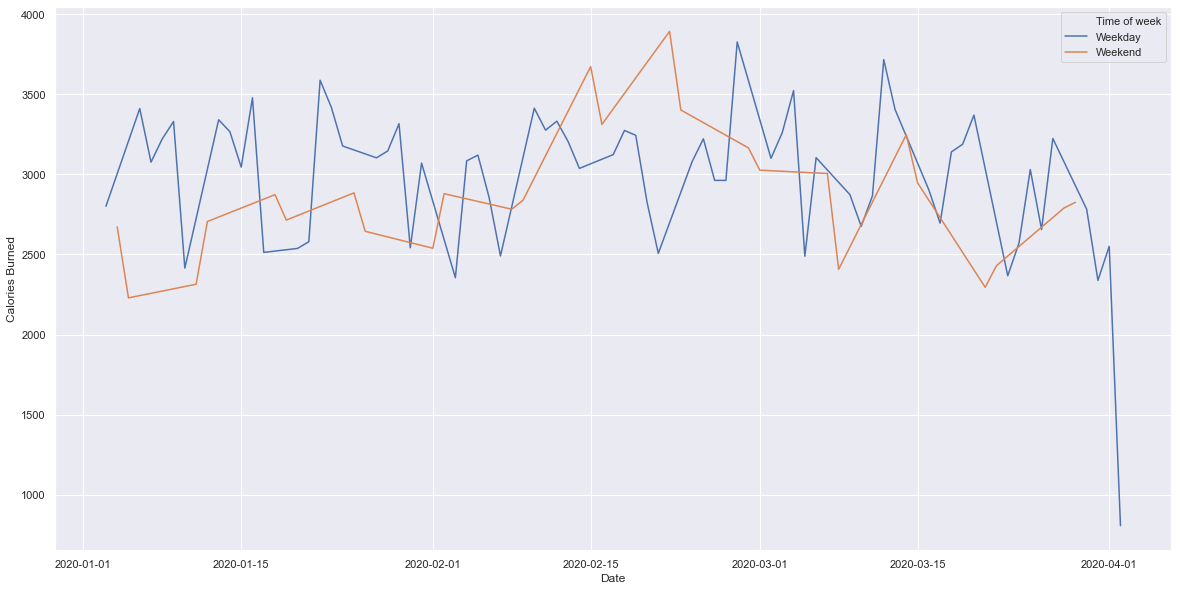

In [22]:
plt.figure(figsize = (20,10))
CalorieTrend = sns.lineplot(x ='Date', y = 'Calories Burned',\
                      hue="Time of week",\
                      data = df )

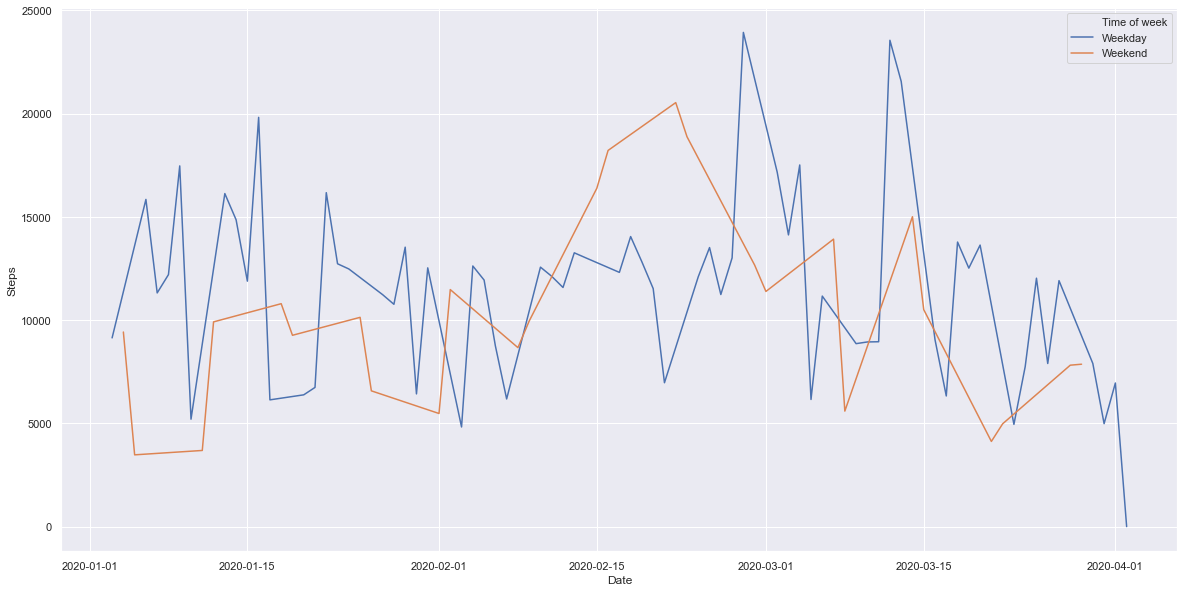

In [32]:
plt.figure(figsize = (20,10))
CalorieTrend = sns.lineplot(x ='Date', y = 'Steps',\
                      hue="Time of week",\
                      data = df )


Combining the trend charts for 'Calories Burned' and 'Steps', we see that both of them follows almost the same trend. Another interesting trend is that, whenever I have an active week, the weekend is not that active and vice versa.

### Bar Chart:

When it comes to understanding your data aggregated on a specific level and draw some form of conclusions, bar charts can be used.

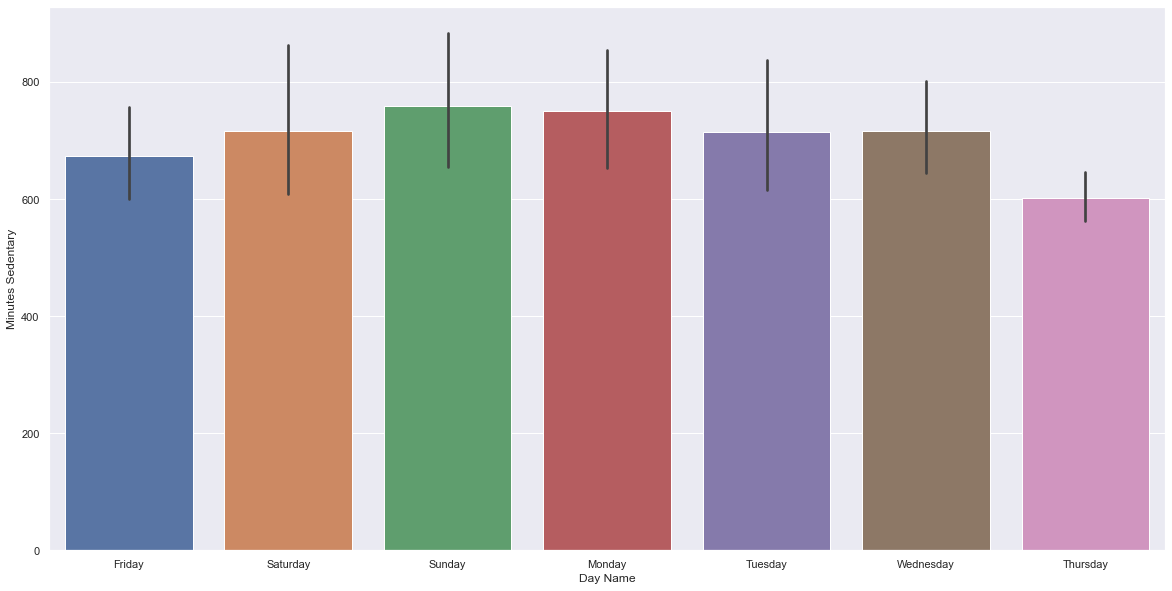

In [52]:
plt.figure(figsize = (20,10))
bp1 = sns.barplot(x ='Day Name', y = 'Minutes Sedentary', data = df )

Look at that interesting trend where my average number of 'Minutes Sedentary' starts increasing from Friday onwards and continues to rise till Sunday. Once Sunday ends, we start seeing a steady dip that continues till Thursday and the cycle repeats.

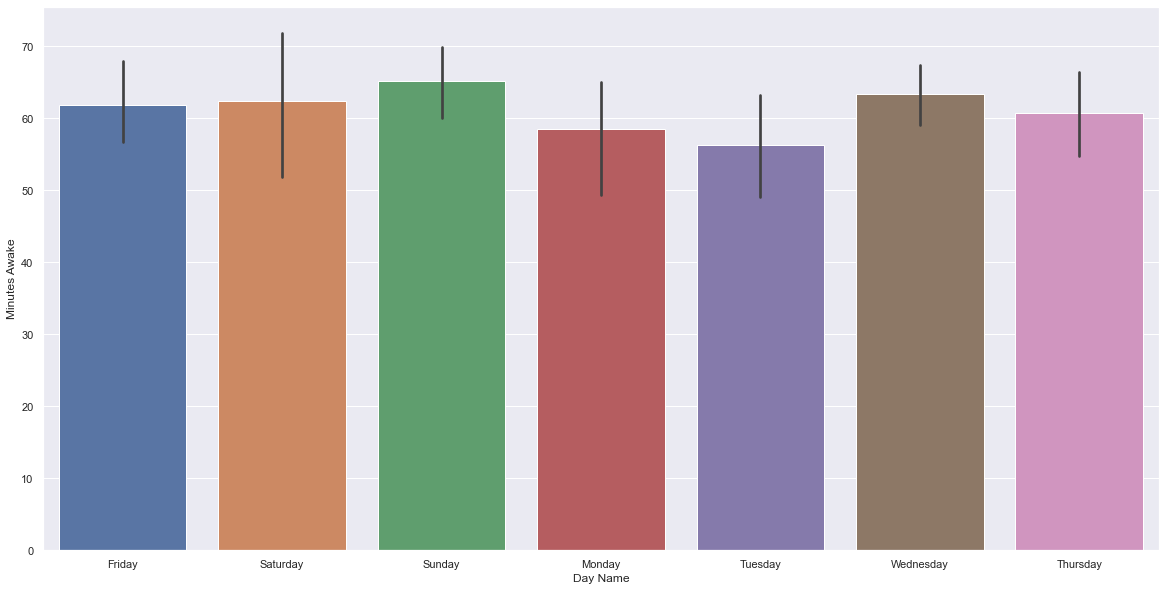

In [60]:

plt.figure(figsize = (20,10))
bp1 = sns.barplot(x ='Day Name', y = 'Minutes Awake', data = df)


As seen, my sleep quality starts to decrease once weekend starts as my 'Minutes Awake' increases from Friday onwards to Sunday. For Monday, there is a sudden dip (a good sign) and it decreases again for Tuesday as well. But the interesting point to ponder upon is the sudden increase again for Wednesdays.

### Conclusion:
    
This ends my EDA of my fitbit data. It was a good way to dig deeper into my data and discover interesting insights, which will help me take care of health better. The next step is to make a dynamic dashboard in Microsoft Power BI, which will help me to slice and dice the data in real time and monitor my health. Also, the next phase in this project would be to add more data to the present data and see if any of the findings change. Lastly, Fitbit has also intraday level data (meaning I can extract some specific data, such as my heart beat, calories burnt etc. down to a very minute level). So I shall try to work with that data as well. 